In [1]:
import torch
from torch.utils import data
import pandas as pd
import albumentations
from albumentations import pytorch as AT
from tqdm import tqdm
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 
import torch.nn.functional as F
import os
import random
from random import sample
import math
from PIL import Image
%pip install gif2numpy
import cv2,gif2numpy
import torchvision.models as models
from torch import nn
from torchsummary import summary
from collections import OrderedDict
import torch.optim as optim
import cv2

Note: you may need to restart the kernel to use updated packages.


In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
use_cuda

True

In [4]:
%cd ../Data

C:\Users\user\ML\session-2\Data


In [5]:
os.getcwd()
print(len(os.listdir()))

4


In [6]:
bird_dictionary={}
base_dir=os.getcwd()
labels=[]
for dirr in os.listdir():
    labels.append(dirr)
    for file in os.listdir(os.path.join(base_dir,dirr)):
        if file.endswith(('.png', '.jpg', '.jpeg', 'gif')):
            bird_dictionary[os.path.join(base_dir,dirr,file)]=str(dirr)

In [7]:
labels

['Flying Birds', 'Large QuadCopters', 'Small QuadCopters', 'Winged Drones']

In [8]:
keys=bird_dictionary.keys()

In [9]:
random.shuffle(list(keys))

In [10]:
keys=sample(keys, len(keys))

In [11]:
new_dict={}
for each_key in keys:
    new_dict[each_key]=labels.index(bird_dictionary[each_key])

In [12]:
part={}
train=math.floor(len(new_dict)*0.7)
part['train']=list(new_dict.keys())[0:train]
part['test']=list(new_dict.keys())[train:]

In [13]:
from dataloaders import Datasett,AlbumentationWrapper
from models import model_params,model_params,Assignment11
from graphs_and_other_utility_functions import plot,save_model,get_lr,plotLRFinder
from train_test import train,test

In [14]:
params = {'batch_size': 32,
          'shuffle': True,
          'num_workers': 10}

In [15]:
train_transforms , test_transforms=AlbumentationWrapper('train'), AlbumentationWrapper('test')

In [16]:
training_set = Datasett(part['train'], new_dict, train_transforms)
training_generator = data.DataLoader(training_set, **params)

test_set = Datasett(part['test'], new_dict, test_transforms)
test_generator = data.DataLoader(test_set, **params)

In [17]:
model = torch.hub.load('pytorch/vision:v0.6.0', 'mobilenet_v2', pretrained=True)
model.classifier[1] = torch.nn.Linear(model.last_channel, 4)

Using cache found in C:\Users\user/.cache\torch\hub\pytorch_vision_v0.6.0


In [18]:
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.0002, momentum=0.9)
#lmbda = lambda epoch: epoch//2
lmbda = lambda epoch: (epoch**2)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lr_lambda=lmbda)
epochs=20
input_size=(3,224,224)

train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
best_loss = 1000.0
misclassified_list = {}
lr=[]
model_params(model, input_size,device)  

#for epoch in range(epochs):
    #lr.append(get_lr(optimizer))
    #print("\nEPOCH: %s LR: %s " % (epoch, get_lr(optimizer)))
    #best_loss=train(model, device, training_generator, optimizer, scheduler, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2, best_loss,True)
    #test(model, device, testloader, test_acc_without_L1_L2, test_losses_without_L1_L2, misclassified_list)
    #scheduler.step()

#print(len(train_acc_without_L1_L2))
#plotLRFinder(train_acc_without_L1_L2,lr,len(training_generator),epochs)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [19]:
#plotLRFinder(train_acc_without_L1_L2,lr,len(training_generator),epochs)

In [20]:
epochs=15
optimizer1 = optim.SGD(model.parameters(), lr=0.0002, momentum=0.9, weight_decay=9e-4)
scheduler1 = torch.optim.lr_scheduler.OneCycleLR(optimizer1, max_lr=0.002, pct_start=0.2 , steps_per_epoch=len(training_generator), div_factor=10, cycle_momentum=False, epochs=epochs)
input_size=(3,224,224)

  0%|                                                                                          | 0/429 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

Loss=0.7498657703399658 Batch_id=428 le=0.0006506348378616084 Accuracy=74.46: 100%|██| 429/429 [03:15<00:00,  2.19it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0141, Accuracy: 4828/5877 (82.15%)

EPOCH: 1 LR: 0.0006506348378616084 


Loss=0.17783458530902863 Batch_id=428 le=0.0015512687801251931 Accuracy=83.45: 100%|█| 429/429 [02:37<00:00,  2.72it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 4991/5877 (84.92%)

EPOCH: 2 LR: 0.0015512687801251931 


Loss=0.2425840198993683 Batch_id=428 le=0.0019999998137962957 Accuracy=85.73: 100%|██| 429/429 [02:37<00:00,  2.72it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0140, Accuracy: 4857/5877 (82.64%)

EPOCH: 3 LR: 0.0019999998137962957 


Loss=0.35503485798835754 Batch_id=428 le=0.001965768043149073 Accuracy=88.06: 100%|██| 429/429 [02:37<00:00,  2.73it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0104, Accuracy: 5151/5877 (87.65%)

EPOCH: 4 LR: 0.001965768043149073 


Loss=0.8392808437347412 Batch_id=428 le=0.001865721457851869 Accuracy=89.84: 100%|███| 429/429 [02:37<00:00,  2.72it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 5110/5877 (86.95%)

EPOCH: 5 LR: 0.001865721457851869 


Loss=0.0883207619190216 Batch_id=428 le=0.0017066780673578874 Accuracy=91.49: 100%|██| 429/429 [02:38<00:00,  2.71it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 5174/5877 (88.04%)

EPOCH: 6 LR: 0.0017066780673578874 


Loss=0.20369087159633636 Batch_id=428 le=0.0014994764158976638 Accuracy=92.65: 100%|█| 429/429 [02:41<00:00,  2.66it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 5135/5877 (87.37%)

EPOCH: 7 LR: 0.0014994764158976638 


Loss=0.1522112786769867 Batch_id=428 le=0.0012582369536012932 Accuracy=93.91: 100%|██| 429/429 [03:31<00:00,  2.02it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 5223/5877 (88.87%)

EPOCH: 8 LR: 0.0012582369536012932 


Loss=0.1781913936138153 Batch_id=428 le=0.0009993997511572124 Accuracy=95.06: 100%|██| 429/429 [04:16<00:00,  1.67it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 5209/5877 (88.63%)

EPOCH: 9 LR: 0.0009993997511572124 


Loss=0.3481016755104065 Batch_id=428 le=0.0007406041361632838 Accuracy=95.86: 100%|██| 429/429 [04:24<00:00,  1.62it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 5224/5877 (88.89%)

EPOCH: 10 LR: 0.0007406041361632838 


Loss=0.08326173573732376 Batch_id=428 le=0.000499486602101368 Accuracy=96.74: 100%|██| 429/429 [04:21<00:00,  1.64it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 5232/5877 (89.03%)

EPOCH: 11 LR: 0.000499486602101368 


Loss=0.007248550653457642 Batch_id=428 le=0.00029247891045221995 Accuracy=97.23: 100%|█| 429/429 [04:28<00:00,  1.60it/
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 5246/5877 (89.26%)

EPOCH: 12 LR: 0.00029247891045221995 


Loss=0.005194753408432007 Batch_id=428 le=0.00013368829330534377 Accuracy=97.67: 100%|█| 429/429 [04:23<00:00,  1.63it/
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 5225/5877 (88.91%)

EPOCH: 13 LR: 0.00013368829330534377 


Loss=0.03461006283760071 Batch_id=428 le=3.393606880539646e-05 Accuracy=97.85: 100%|█| 429/429 [04:15<00:00,  1.68it/s]
  0%|                                                                                          | 0/429 [00:00<?, ?it/s]


Test set: Average loss: 0.0125, Accuracy: 5234/5877 (89.06%)

EPOCH: 14 LR: 3.393606880539646e-05 


Loss=0.014611005783081055 Batch_id=428 le=2.0186203704465716e-08 Accuracy=98.07: 100%|█| 429/429 [04:39<00:00,  1.54it/



Test set: Average loss: 0.0125, Accuracy: 5241/5877 (89.18%)



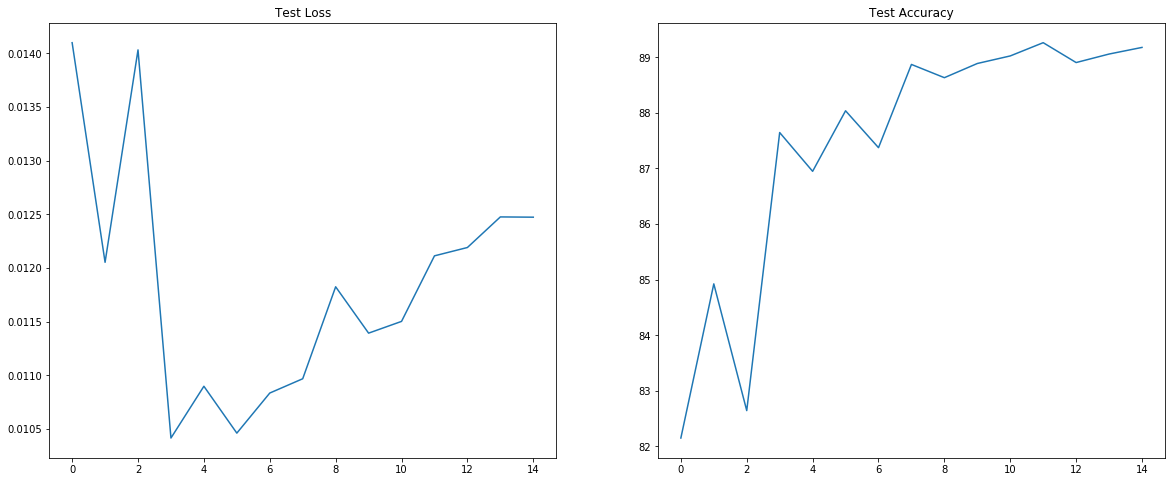

In [21]:
train_losses_without_L1_L2 = []
test_losses_without_L1_L2 = []
train_acc_without_L1_L2 = []
test_acc_without_L1_L2 = []
best_loss = 1000.0
misclassified_list = {}
model_params(model, input_size,device)  

for epoch in range(epochs):
    print("EPOCH: %s LR: %s " % (epoch, get_lr(optimizer1)))
    best_loss=train(model, device, training_generator, optimizer1, scheduler1, epoch, False, train_acc_without_L1_L2, train_losses_without_L1_L2, best_loss, False)
    test(model, device, test_generator, test_acc_without_L1_L2, test_losses_without_L1_L2, misclassified_list)
    #scheduler.step()
plot(train_losses_without_L1_L2,train_acc_without_L1_L2, test_losses_without_L1_L2, test_acc_without_L1_L2, 'without L1 and L2')

In [22]:
it=iter(test_generator)
first,next=next(it)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


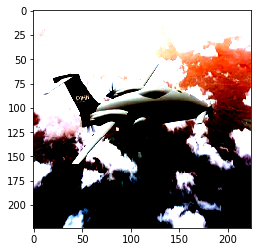

In [23]:
c=math.floor(len(new_dict)*0.7)
f=list(new_dict.keys())[c]
g=cv2.imread(f)
ng=test_transforms(g)
nng=ng.permute(1, 2, 0)
plt.imshow(nng)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


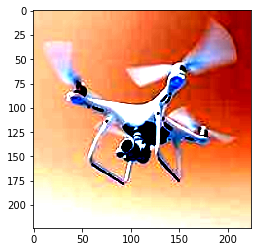

In [24]:
plt.imshow(first[6].permute(1, 2, 0))

In [25]:
traced_model=torch.jit.trace(model.cpu(),torch.randn(32,3,224,224))
torch.jit.save(traced_model, r"C:\Users\user\ML\session-2\Modular\Custom-MobileNetV2.pt")

In [26]:
l1=list(misclassified_list.values())
bird=[]
lquad=[]
squad=[]
wdrone=[]
for x in l1:
    k=x[1][0].item()
    if k==0:
        bird.append(x)
    elif k==1:
        lquad.append(x)
    elif k==2:
        squad.append(x)
    else:
        wdrone.append(x)

In [27]:
final_misclassified={}
counter=0
for i in range(10):
    final_misclassified[counter]=bird[i]
    counter+=1
    final_misclassified[counter]=lquad[i]
    counter+=1
    final_misclassified[counter]=squad[i]
    counter+=1
    final_misclassified[counter]=wdrone[i]
    counter+=1

In [28]:
def plot_misclassified_images(missclassified,filename):
  mis_Class_list=list(missclassified.values())
  # each_Item=missclassified.keys()
  print("type= ",type(mis_Class_list[0][2]))
  print("classified= ",mis_Class_list[0][2].shape)
  #print("classified1= ",mis_Class_list[0][2].reshape(224,224,3).shape)
  fig = plt.figure(figsize=(10, 10))  # width, height in inches
  columns = 4
  rows = 10
  for i in range(columns*rows):
      sub = fig.add_subplot(rows, columns, i+1)
      each_img=mis_Class_list[i][2]
      each_img=torch.from_numpy(each_img)    
      shape_change=each_img.permute(1, 2, 0)
      # print("new shape= ",shape_change.shape)
      # sub.imshow(plt.imshow(shape_change,cmap='gray',interpolation='none'))
      plt.imshow(shape_change,cmap='plasma',interpolation='none')
      sub.set_title("Pred={}, Act={}".format(mis_Class_list[i][0].tolist()[0],mis_Class_list[i][1].tolist()[0]))
  plt.tight_layout()
  plt.savefig(os.path.join(r'C:\Users\user\ML\session-2\Modular',filename))
  plt.show()

type=  <class 'numpy.ndarray'>
classified=  (3, 224, 224)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

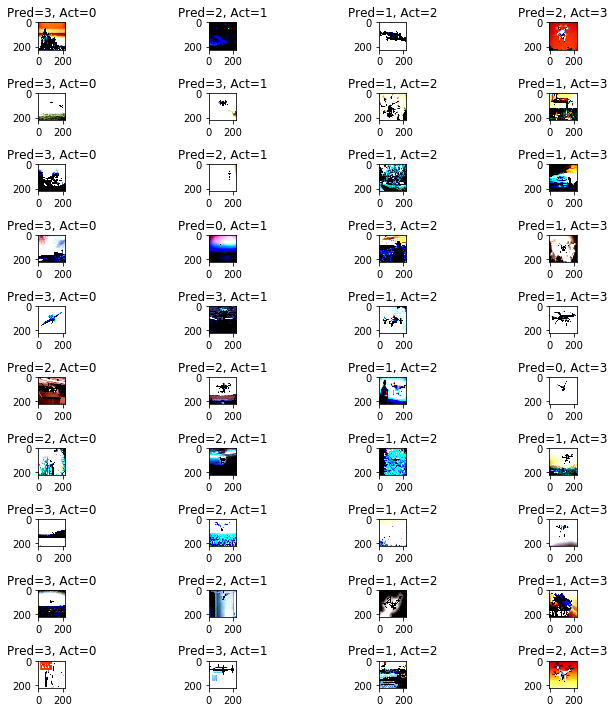

In [29]:
plot_misclassified_images(final_misclassified,'misclassifed-bird-drone.jpg')